# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [52]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scipy.ndimage import convolve
from skimage.filters import gaussian


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

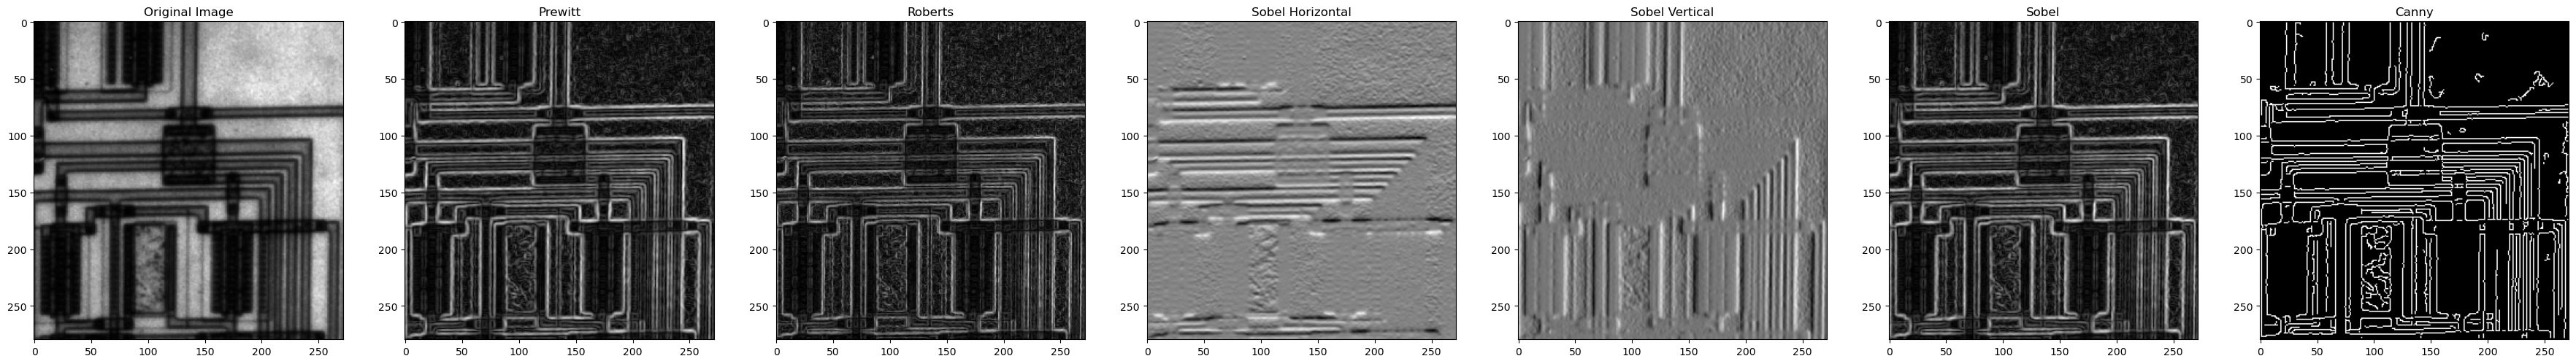

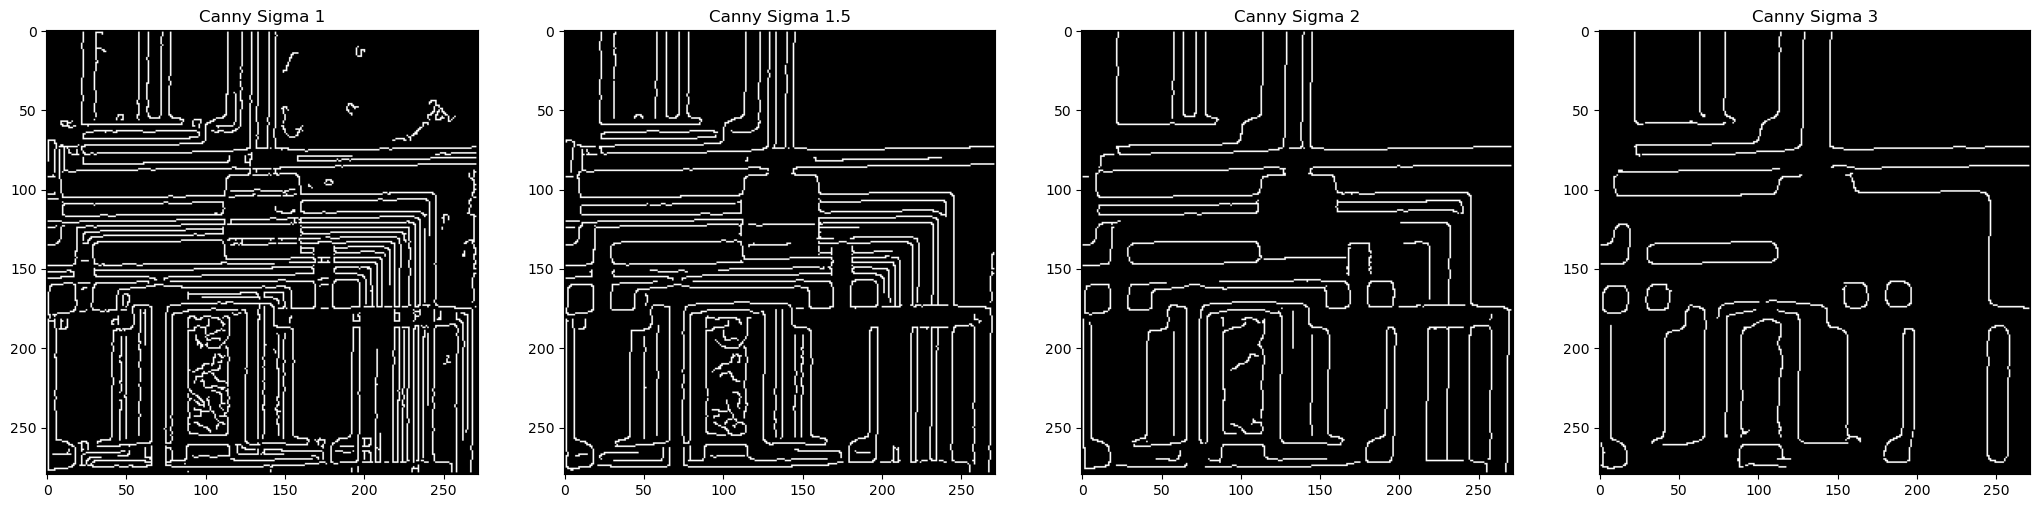

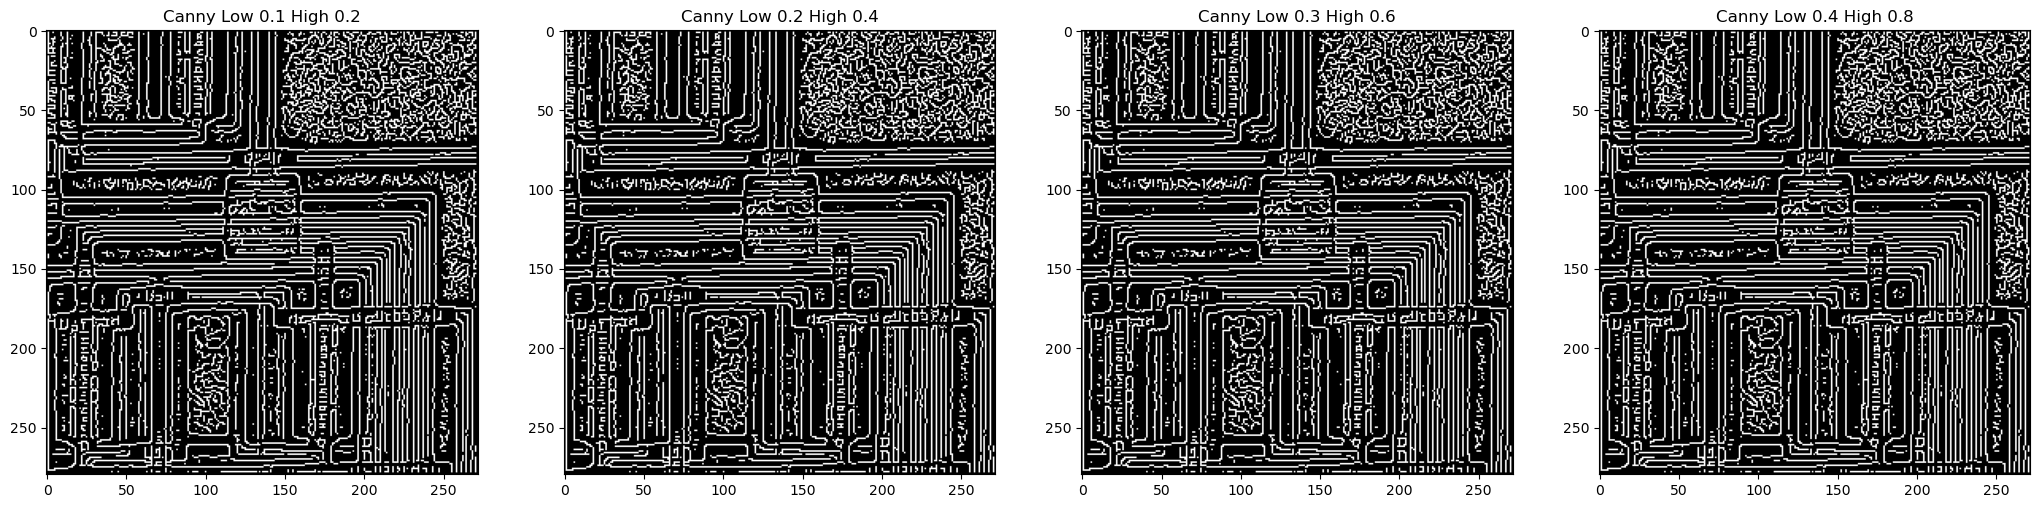

In [66]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

# img = rgb2gray(io.imread('circuit.tif'))
img = io.imread('circuit.tif')

edges_prewitt = prewitt(img)
edges_roperts = roberts(img)
edges_sobel_h = sobel_h(img)
edges_sobel_v = sobel_v(img)
edges_sobel = sobel(img)
edges_canny = canny(img)

show_images([img, edges_prewitt, edges_roperts, edges_sobel_h, edges_sobel_v, edges_sobel, edges_canny], ['Original Image', 'Prewitt', 'Roberts', 'Sobel Horizontal', 'Sobel Vertical', 'Sobel', 'Canny'])


show_images([canny(img, sigma=1), canny(img, sigma=1.5), canny(img, sigma=2), canny(img, sigma=3)], ['Canny Sigma 1', 'Canny Sigma 1.5', 'Canny Sigma 2', 'Canny Sigma 3'])
show_images([canny(img, low_threshold=0.1, high_threshold=0.2), canny(img, low_threshold=0.2, high_threshold=0.4), canny(img, low_threshold=0.3, high_threshold=0.6), canny(img, low_threshold=0.4, high_threshold=0.8)], ['Canny Low 0.1 High 0.2', 'Canny Low 0.2 High 0.4', 'Canny Low 0.3 High 0.6', 'Canny Low 0.4 High 0.8'])

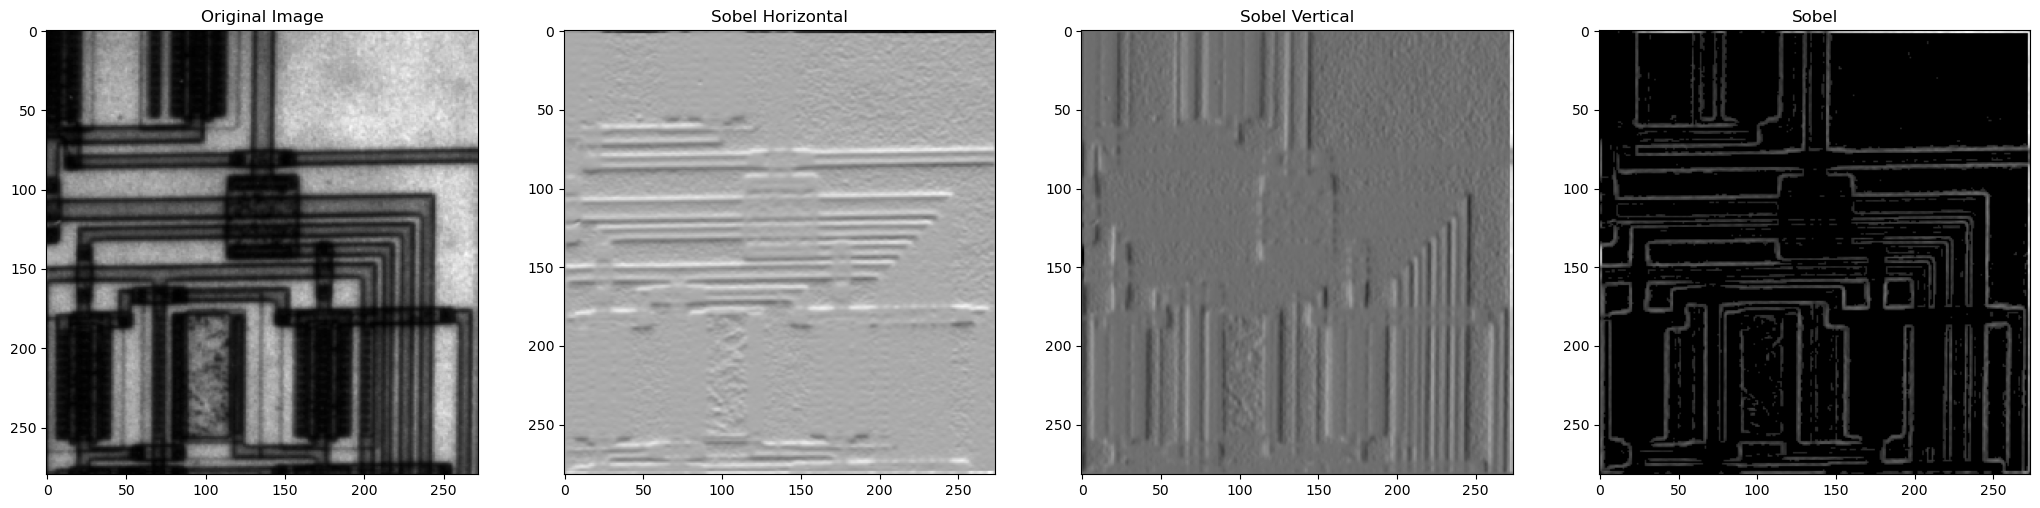

In [51]:

# 2. Custom Sobel (V-H-Both)
hy = np.array([ [-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]])

hx = np.array([ [-1, -2, -1],
                [0, 0, 0],
                [1, 2, 1]])

img = io.imread('circuit.tif')

img_x = convolve2d(img, hx)
img_y = convolve2d(img, hy)

new_img = np.sqrt(img_x**2 + img_y**2)

threshold = 100
new_img[new_img < threshold] = 0

show_images([img, img_x, img_y, new_img], ['Original Image', 'Sobel Horizontal', 'Sobel Vertical', 'Sobel'])



[[ -15.15052688  -30.04312292  -44.6568565  ... -434.61844645
  -288.96470106 -144.52133654]
 [ -30.63831219   75.85081855   44.39169161 ...  431.8563194
   720.83204311 -291.36243993]
 [ -46.63238654   47.60844053   -0.83425908 ...   -7.30304499
   448.22512982 -440.10312632]
 ...
 [-112.17993915   79.63209646   -4.59191945 ...    7.95314653
   177.19922122 -199.69249665]
 [ -69.93075228  140.21584882  104.74715339 ...  226.61538189
   317.13732218 -133.40002607]
 [ -32.95740027  -73.2210776  -119.85716375 ... -222.06040528
  -141.18906393  -66.64993335]]


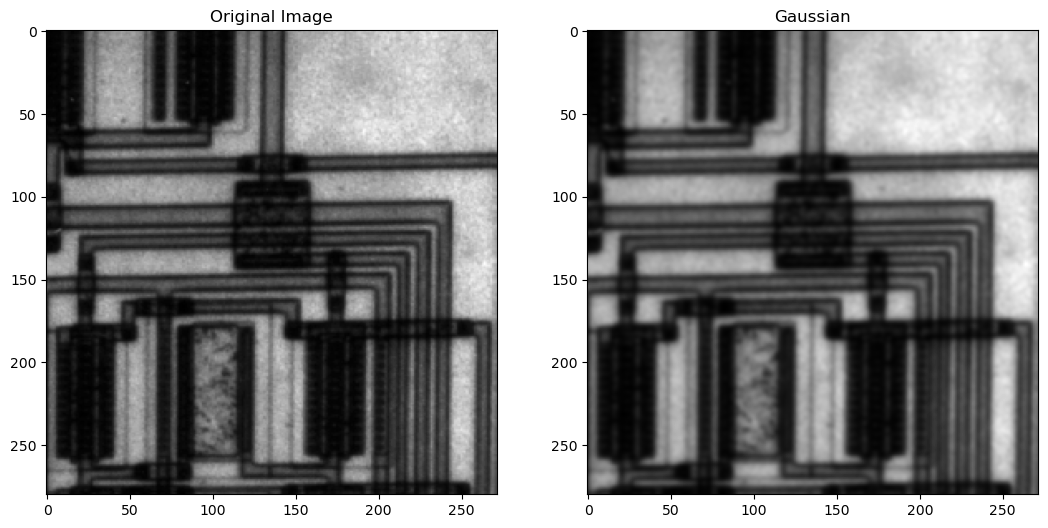

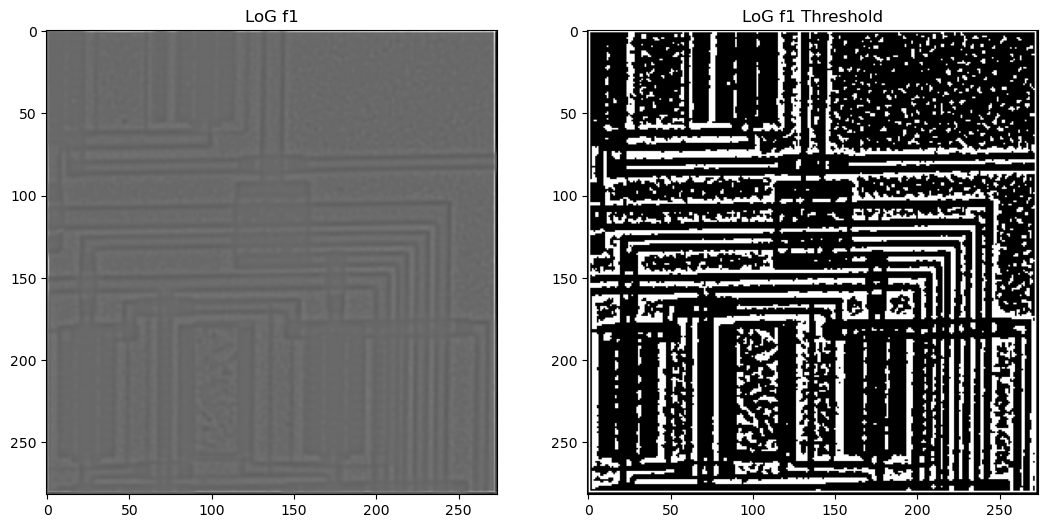

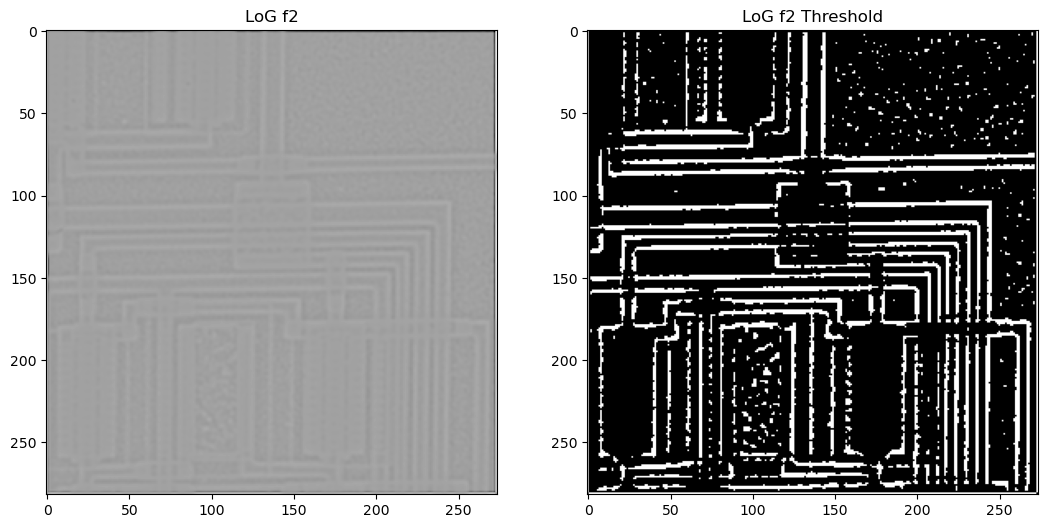

In [63]:
# 3. Custom LoG
thres= 10
thres2 = 5
img = io.imread('circuit.tif')
img_gaussian = gaussian(img, sigma=1)*255

# print(img_gaussian)

f1 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

f2 = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

img_f1 = convolve2d(img_gaussian, f1) 
img_f2 = convolve2d(img_gaussian, f2)

print (img_f1)

img_f1_threshold = img_f1.copy()
img_f2_threshold = img_f2.copy()

img_f1_threshold[img_f1_threshold < thres] = 0
img_f1_threshold[img_f1_threshold >= thres] = 255

img_f2_threshold[img_f2_threshold < thres2] = 0
img_f2_threshold[img_f2_threshold >= thres2] = 255

show_images([img, img_gaussian], ['Original Image', 'Gaussian'])
show_images([img_f1, img_f1_threshold], ['LoG f1', 'LoG f1 Threshold'])
show_images([img_f2, img_f2_threshold], ['LoG f2', 'LoG f2 Threshold'])



[[ 15  15  15 ... 148 144 142]
 [ 16  14  14 ... 135 144 151]
 [ 16  16  14 ... 134 141 152]
 ...
 [ 36  59  78 ...  87  76  61]
 [ 31  45  53 ...  88  76  63]
 [ 27  39  47 ...  87  74  62]]
[[ 7.5  7.5  7.5 ... 74.  72.  71. ]
 [ 8.   7.   7.  ... 67.5 72.  75.5]
 [ 8.   8.   7.  ... 67.  70.5 76. ]
 ...
 [18.  29.5 39.  ... 43.5 38.  30.5]
 [15.5 22.5 26.5 ... 44.  38.  31.5]
 [13.5 19.5 23.5 ... 43.5 37.  31. ]]
[[ 7.5  7.5  7.5 ... 74.  72.  71. ]
 [ 8.   7.   7.  ... 67.5 72.  75.5]
 [ 8.   8.   7.  ... 67.  70.5 76. ]
 ...
 [18.  28.5 38.  ... 43.5 38.  30.5]
 [15.5 22.5 26.5 ... 44.  38.  31.5]
 [13.5 19.5 23.5 ... 43.5 37.  31. ]]


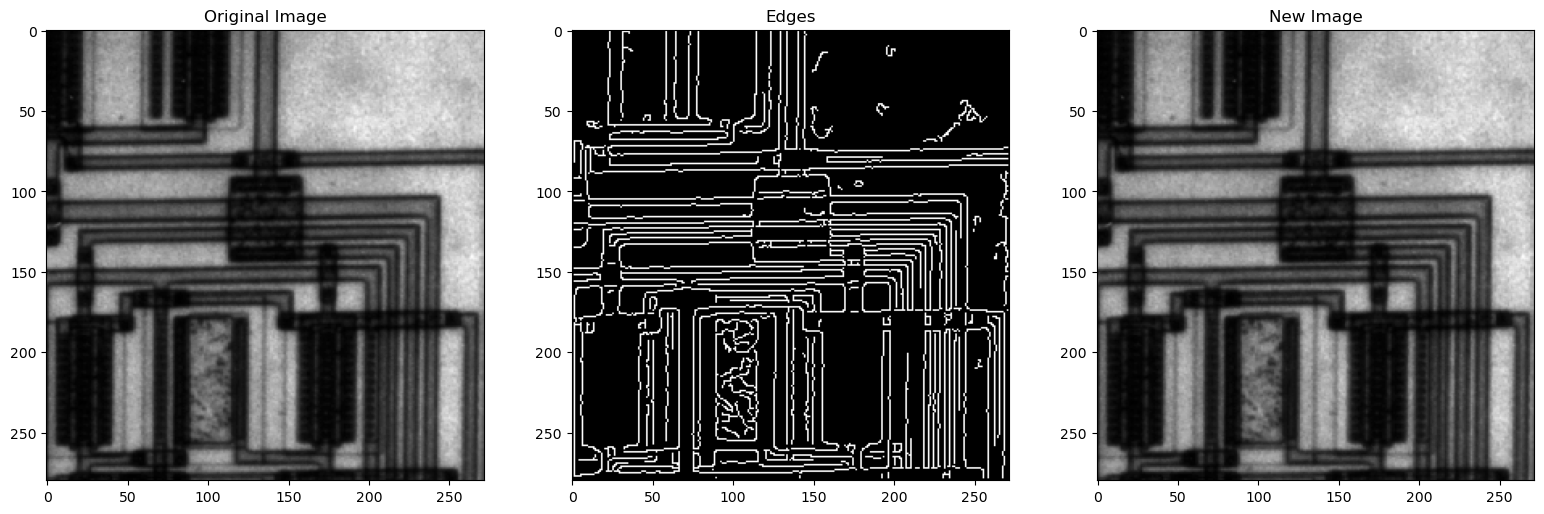

In [83]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

img = io.imread('circuit.tif')
edges = canny(img)
# print (edges)
factor = 0.5
print (img)
img = img * factor
print (img)
new_img = img - edges
print (new_img)

show_images([img, edges, new_img], ['Original Image', 'Edges', 'New Image'])
